In [1]:
# import libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score,ConfusionMatrixDisplay

In [2]:
# read the dataset
df = pd.read_csv(r"D:\OneDrive - NITT\Custom_Download\Assignment 3_Q1 diabetes_health_indicators_data.csv")

In [3]:
# get 20000 sample 
df = df.sample(20000,random_state=42)

In [4]:
# display top 5 rows
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
186913,0,1,1,1,23,0,0,1,1,1,...,1,0,3,0,0,0,1,13,6,5
239126,0,1,1,1,34,1,0,0,1,1,...,1,0,3,0,0,0,0,10,4,7
184226,0,0,1,0,27,0,0,0,1,1,...,1,0,2,3,0,0,0,3,6,8
232560,0,1,0,1,23,0,0,0,1,1,...,1,0,1,1,0,0,0,9,5,8
224748,0,0,0,1,22,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8


In [5]:
# check for missing Values
df.isna().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# get X and y
X = df.drop('Diabetes',axis=1).values
y = df['Diabetes'].values

In [7]:
# split the data into train and test i.e 80:20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# create empty dataframe to store the models result
result = pd.DataFrame([],columns=['Model Name','AUC'])


# function to perform prediction on test set and print AUC score and confusion matrix
def predict_and_display(classifier,name):
    
    # predict on test set
    y_pred = classifier.predict(X_test)
    
    # compute AUC score
    auc = roc_auc_score(y_test, y_pred)
    print("Auc:",round(auc,3))
    
    print('---------Confusion Matrix--------------')
    cm = confusion_matrix(y_test, y_pred, labels=[0,1],normalize ="true")
    
    # display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=[0,1])

    # store models result
    result.loc[len(result)] = [name,auc]
    
    disp.plot()
    plt.show()

# Logistic Regression

In [10]:
# Build and Fit Logistic Regression to the Training set
clf_logistic = LogisticRegression(random_state = 42)
clf_logistic.fit(X_train, y_train)

LogisticRegression(random_state=42)

Auc: 0.579
---------Confusion Matrix--------------


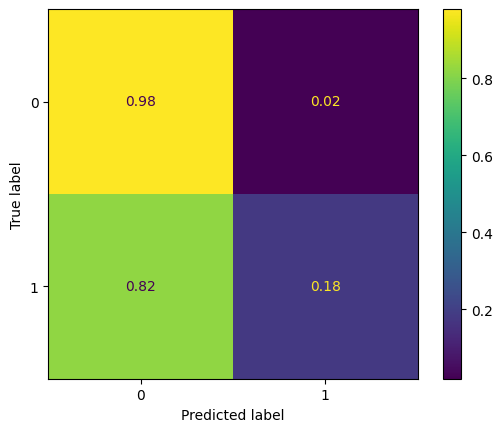

In [11]:
# predict and display results
predict_and_display(clf_logistic,name = 'LogisticRegression')

# KNN classifier
- Elbow Method

In [12]:
error_rate = []

# perform elbow method to get optimal K
# run knn with k=2 to 19
for i in tqdm(range(2,20)):
    
    # build knn
    clf = KNeighborsClassifier(n_neighbors=i)
    
    # fit and predict
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # compute how many times (in percentage) y_pred is not equal to y_test
    error_rate.append(np.mean(y_pred != y_test))


100%|███████████████████████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.96it/s]


Minimum error:- 0.1365 at k= 16


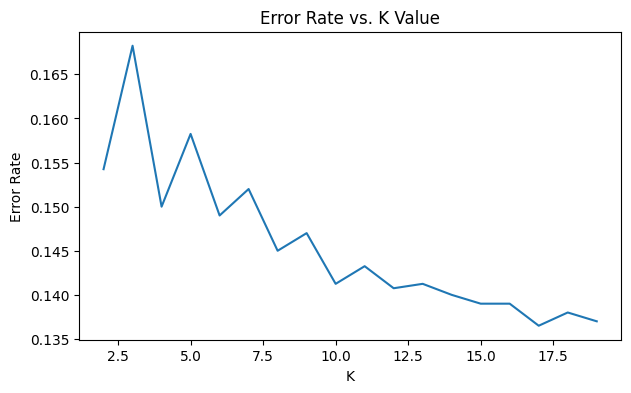

In [13]:
# plot the graph
plt.figure(figsize=(7,4))
plt.plot(range(2,20),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# at what value of k, the error was less
# 1 is added since array index starts with 0
k_best = np.array(error_rate).argmin()+1

print("Minimum error:-",min(error_rate),'at k=',k_best)

Auc: 0.549
---------Confusion Matrix--------------


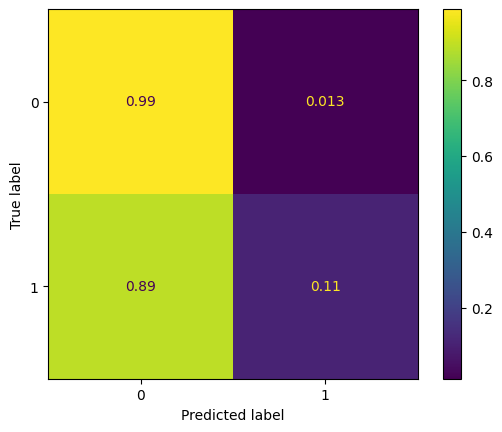

In [14]:
# train the knn model on k_best
clf_knn = KNeighborsClassifier(n_neighbors = k_best)

# Fit KNeighborsClassifier to the Training set
clf_knn.fit(X_train, y_train)

# predict and display results
predict_and_display(clf_knn,name = 'KNeighborsClassifier')

# Decision Tree classifier

In [15]:
# Fitting Decision Tree Classification to the Training set
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Auc: 0.601
---------Confusion Matrix--------------


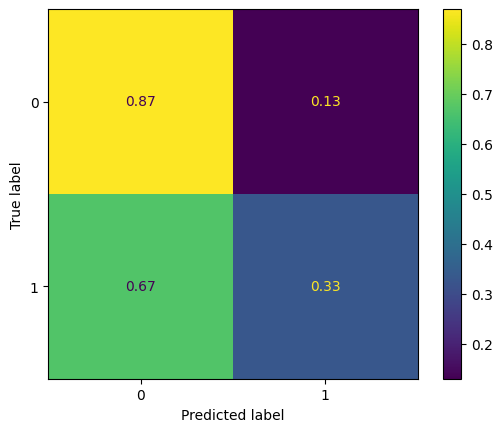

In [16]:
# predict and display results
predict_and_display(clf_dt,name='DecisionTreeClassifier')

# Neural Networks 

In [17]:
# Build and Fit MLPClassifier to the Training set
clf_mlp = MLPClassifier(hidden_layer_sizes=(20, 10), activation='logistic', 
                        solver='lbfgs',random_state=42,  max_iter=1000)

clf_mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 10), max_iter=1000,
              random_state=42, solver='lbfgs')

Auc: 0.625
---------Confusion Matrix--------------


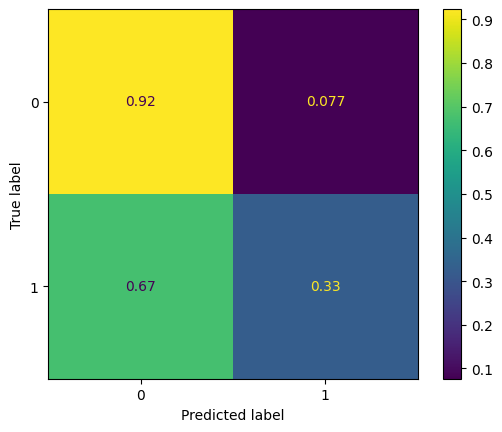

In [18]:
# predict and display results
predict_and_display(clf_mlp,name = 'MLPClassifier')

# GridSearchCV

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Auc: 0.572
---------Confusion Matrix--------------


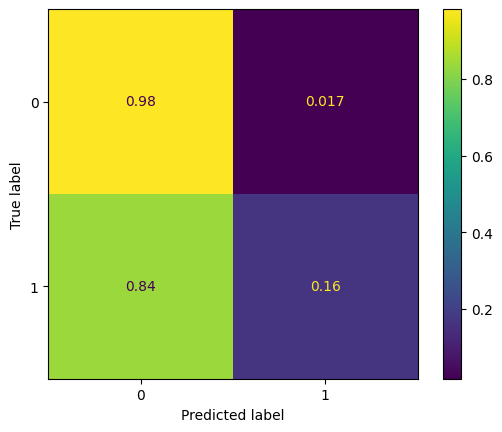

In [19]:
#parameters search space
parameter_space = {
    'hidden_layer_sizes': [(20,10)],
    'activation': ['tanh','logistic'],
    'solver': ['lbfgs','adam'],
    'alpha': [0.05,0.06],
    'learning_rate': ['constant','adaptive'],
}

# apply GridSearchCV to get best parameters for optimal model
gridSearch = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid=parameter_space, 
                          n_jobs=-1,verbose=True,scoring='roc_auc')

# train the model on train set
gridSearch.fit(X_train, y_train)

# get the model trained on best parameters
best_model_mlp = gridSearch.best_estimator_

# perform prediction this best model
predict_and_display(best_model_mlp,name = 'MLPClassifier - Grid Search')

# Final Result

In [20]:
result

,Model Name,AUC
0,LogisticRegression,0.579322
1,KNeighborsClassifier,0.549178
2,DecisionTreeClassifier,0.600510
3,MLPClassifier,0.624641
4,MLPClassifier - Grid Search,0.571971


- based on the result , its safe to say that MLPClassifier is the best performing model with AUC score of 0.624